VGG16

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 434s 553ms/step - accuracy: 0.4282 - loss: 1.6108 - val_accuracy: 0.6741 - val_loss: 0.9488
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 415s 530ms/step - accuracy: 0.6501 - loss: 1.0334 - val_accuracy: 0.7083 - val_loss: 0.8524
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 414s 530ms/step - accuracy: 0.6897 - loss: 0.9155 - val_accuracy: 0.7316 - val_loss: 0.7808
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 416s 532ms/step - accuracy: 0.7086 - loss: 0.8556 - val_accuracy: 0.7358 - val_loss: 0.7852
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 418s 534ms/step - accuracy: 0.7266 - loss: 0.8012 - val_accuracy: 0.7393 - val_loss: 0.7630
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 419s 536ms/step - accuracy: 0.7437 - loss: 0.7534 - val_accuracy: 0.7180 - val_loss: 0.8313
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 428s 548ms/step - accuracy: 0.7575 - loss: 0.7075 - val_accuracy: 0.7452 - val_loss: 0.7391
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 422s 539ms/step - accuracy: 0.7702 -

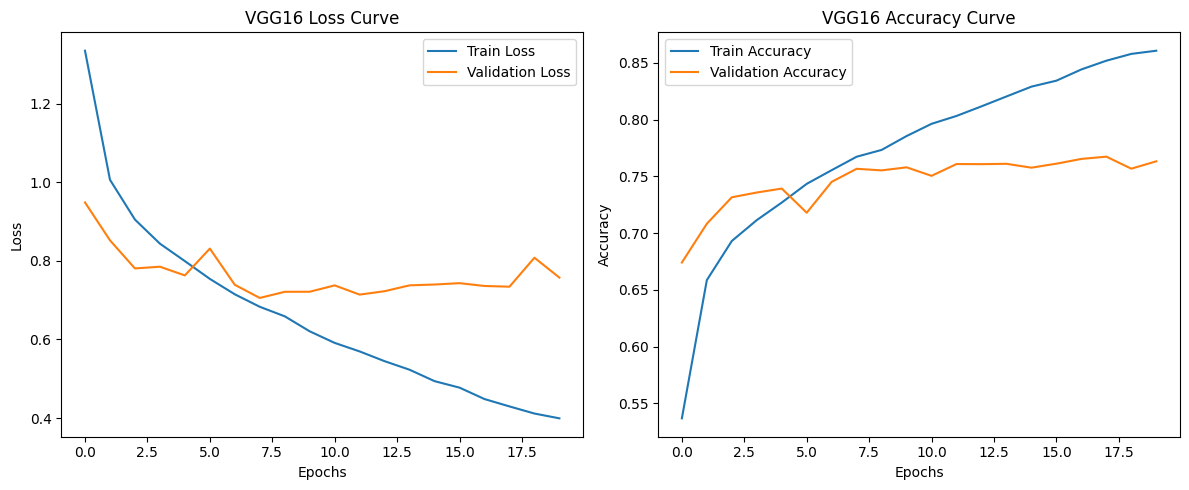

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="keras")

# 1. 加載 CIFAR-10 數據集
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # 歸一化
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)  # One-hot 編碼

# 2. 數據增強
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(X_train)

# 3. 構建 VGG16 模型
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers[:-4]:  # 解凍最後 4 層
    layer.trainable = False

# 4. 添加分類層
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),  # 增加神經元數量
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# 5. 編譯模型
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. 模型訓練
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_test, y_test),
                    epochs=20,
                    verbose=1)

# 7. 模型評估
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# 8. 繪製訓練曲線
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

VGG19

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 182s 232ms/step - accuracy: 0.3497 - loss: 1.8169 - val_accuracy: 0.5124 - val_loss: 1.3759
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 231ms/step - accuracy: 0.4750 - loss: 1.4919 - val_accuracy: 0.5372 - val_loss: 1.3119
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 182s 233ms/step - accuracy: 0.4913 - loss: 1.4383 - val_accuracy: 0.5561 - val_loss: 1.2610
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 230ms/step - accuracy: 0.5075 - loss: 1.3965 - val_accuracy: 0.5554 - val_loss: 1.2671
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 230ms/step - accuracy: 0.5139 - loss: 1.3846 - val_accuracy: 0.5551 - val_loss: 1.2505
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 231ms/step - accuracy: 0.5164 - loss: 1.3663 - val_accuracy: 0.5629 - val_loss: 1.2352
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 230ms/step - accuracy: 0.5283 - loss: 1.3406 - val_accuracy: 0.5602 - val_loss: 1.2404
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 231ms/step - accuracy: 0.5252 -

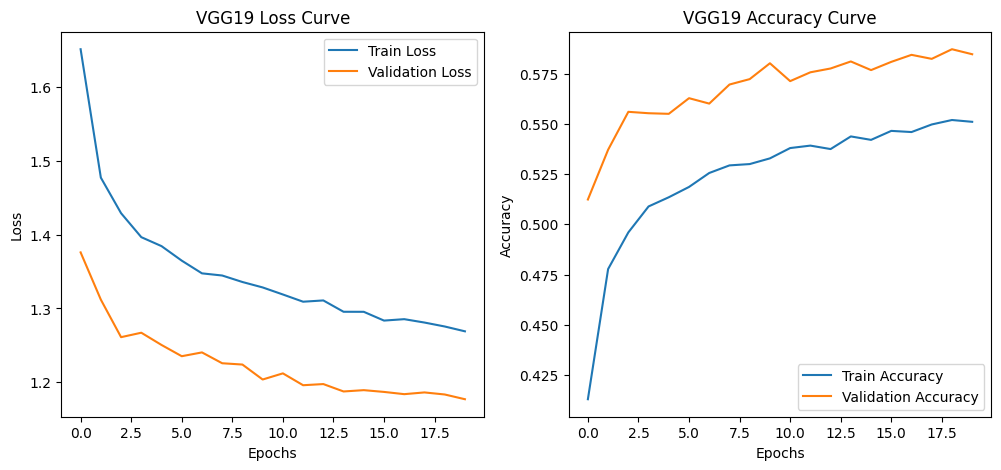

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="keras")

# 1. 載入 CIFAR-10 資料集
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 2. 資料正規化
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 將標籤轉為 One-Hot 編碼
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 3. 資料增強
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# 4. 建立 VGG19 預訓練模型
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze base model layers

# 自定義輸出層
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 5. 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. 訓練模型
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_test, y_test),
                    epochs=20)

# 7. 評估模型
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# 8. 可視化結果
plt.figure(figsize=(12, 5))

# Loss 曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG19 Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG19 Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()